Create the data

In [1]:
import numpy as np
X = np.linspace(0, 1, 20).reshape(-1, 1) # matrix shape

def formula(x):
    return (1 + 0.6 * np.sin (2 * np.pi * x / 0.7)) + 0.3 * np.sin (2 * np.pi * x) / 2

Y = [formula(x) for x in X]

### Structure of the multilayer perceptron

In [2]:
# Model hyperparameters
hidden_neurons = 5
input_neurons = 1
output_neurons = 1
learning_rate = 0.5
epochs = 1000

# Hidden layer activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

### Model creation

In [3]:
np.random.seed(22)  # For reproducibility

# Initialize weights and biases
W1 = np.random.randn(input_neurons, hidden_neurons)  # Input to hidden layer weights
b1 = np.random.randn(1, hidden_neurons)              # Bias for hidden layer

W2 = np.random.randn(hidden_neurons, output_neurons) # Hidden to output layer weights
b2 = np.random.randn(1, output_neurons)              # Bias for output layer

### Training

In [4]:
# Training loop with backpropagation example-by-example
loss_history = []

for epoch in range(epochs):
    total_loss = 0  # To track the cumulative loss over all examples
    
    # Iterate over each example
    for i in range(len(X)):
        x_i = X[i].reshape(1, -1)  # Single input example
        y_i = Y[i].reshape(1, -1)  # Single target value

        # Forward pass
        hidden_input = np.dot(x_i, W1) + b1
        hidden_output = sigmoid(hidden_input)  # Hidden layer activation with sigmoid

        final_input = np.dot(hidden_output, W2) + b2
        output = final_input  # Linear activation at output layer

        # Compute error for this example
        error = y_i - output

        # Compute loss for this example
        loss = 0.5 * (error ** 2)  # 1/2 * (error^2)
        total_loss += loss  # Accumulate total loss for monitoring

        # Backpropagation for this example
        # Output layer gradient
        d_output = error  # Derivative of 1/2 * (error^2) according to the output

        # Gradients for output layer weights
        W2_grad = np.dot(hidden_output.T, d_output)
        b2_grad = d_output

        # Gradients for hidden layer
        d_hidden_output = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)
        W1_grad = np.dot(x_i.T, d_hidden_output)
        b1_grad = d_hidden_output

        # Update weights and biases for this example
        W2 += learning_rate * W2_grad
        b2 += learning_rate * b2_grad
        W1 += learning_rate * W1_grad
        b1 += learning_rate * b1_grad

    # Print the cumulative loss at intervals to monitor progress
    loss_history.append(total_loss[0][0])

In [5]:
# Print final weights and biases
print("\nFinal weights and biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)


Final weights and biases:
W1: [[ -1.09930843 -14.68093924   6.88777263  -2.78749265  -1.71985678]]
b1: [[-2.34624594  5.1973526  -2.44864815 -1.55338264 -2.05128791]]
W2: [[-0.63096857]
 [ 4.55030735]
 [ 4.66813427]
 [-1.58611835]
 [-1.11588557]]
b2: [[-3.28739488]]


### Plot loss history 

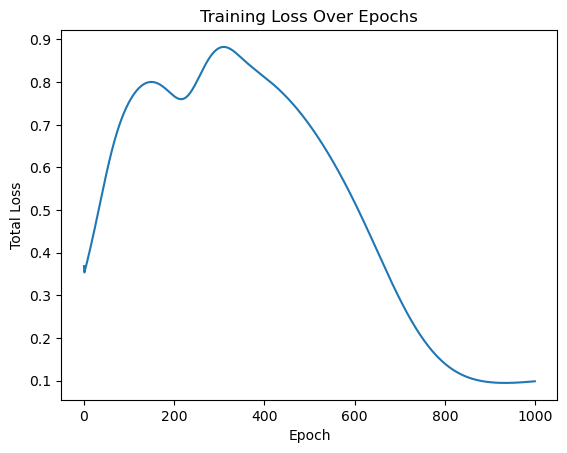

In [6]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training Loss Over Epochs')
plt.show()

The loss decreases over time as the algorithm updates the weights using backpropagation

### Testing

Now we're going to generate new data and use it to make predictions and test the model's accuracy

In [7]:
TEST_SIZE = 50

# Generate random test data
X_test_ = np.random.rand(TEST_SIZE, 1)  # Random points in the range [0, 1]
X_test = [x for x in X_test_ if not np.any(np.isclose(X, x))]  # Keep only unique points not in X
X_test = np.array(X_test).reshape(-1, 1)

# Calculate the true values for the test data
Y_test = np.array([formula(x) for x in X_test]).reshape(-1, 1)

In [8]:
# Define the function to apply the model
def apply_model(x, W1, b1, W2, b2):
    # Forward pass through the network
    hidden_input = np.dot(x, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    return final_input  # Linear activation

# Apply model to test data
predictions = apply_model(X_test, W1, b1, W2, b2)

The following chart shows the predicted values vs real values

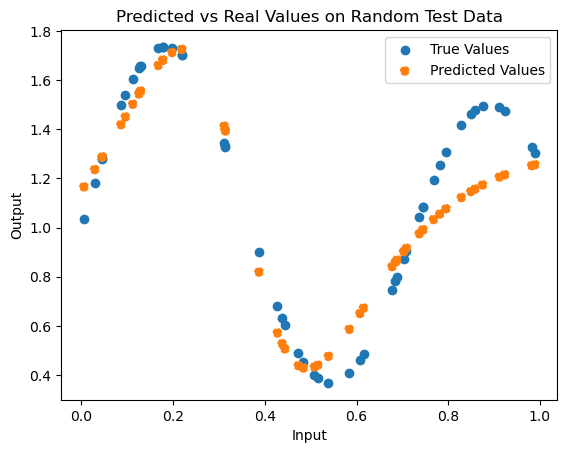

In [9]:
# Sort test data and predictions for cleaner plot
sorted_indices = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sorted_indices]
Y_test_sorted = Y_test[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot predicted values vs real values
plt.scatter(X_test_sorted, Y_test_sorted, label='True Values')
plt.scatter(X_test_sorted, predictions_sorted, label='Predicted Values', linestyle='dashed')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Predicted vs Real Values on Random Test Data')
plt.legend()
plt.show()

In [10]:
# Calculate Mean Squared Error for the test set
mse = np.mean((Y_test - predictions) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

Mean Squared Error on Test Set: 0.0194
